<a href="https://colab.research.google.com/github/naufalhawari/gemastik-data-minik-esteh/blob/main/esteh_juara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Environment dan Membuat Dataset

## Mengunduh Library yang Dibutuhkan

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.9 MB/s eta 0:00:00


In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.5 MB/s eta 0:00:00


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", 50)

## Mendapatkan Dan Praproses Dataset

In [ ]:
# File path yang berisi dataset yang telah dilakukan labeling dalam format file .csv
file_path = "https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-df.csv"


In [ ]:
# Import kelas StemmerFactory untuk melakukan ekstraksi kata dasar (stemming) pada teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


peta_perbaikan = {
    " ga ": " tidak ",
    " engga ": " tidak ",
    " ngga ": " tidak ",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    "ngak": " tidak ",
    " tdk ": " tidak ",
    " g ": " tidak ",
    "pdhl": " padahal ",
    "adlh": " adalah ",
    "cuman": " hanya ",
    " cuma ": " hanya ",
    " tapi ": " tetapi ",
    " tp ": " tetapi ",
    "bngt": " banget ",
    "hny": " hanya ",
    "spt": " seperti ",
    "sprt": " seperti ",
    "apk": " aplikasi ",
    "jgn": " jangan ",
    " jg ": " juga ",
    "trs": " terus ",
    "utk": " untuk ",
    " sampe ": " sampai ",
    " ampe ": " sampai ",
    " d ": " ",
    " n ": " ",
    " bs ": " bisa ",
    " k ": " ",
    " e ": " ",
    "tlg": " tolong ",
    " sm ": " sama ",
    "matursuwun": " terima kasih ",
    "msh": " masih ",
    " jd ": " jadi ",
    " dlu ": " ",
    "dahulu": " ",
    " yg ": " ",
    "apk": " aplikasi ",
    "apps": " aplikasi ",
    " app ": " aplikasi ",
    " tuk ": " ",
    "untk": " ",
    "utk": " ",
    "org": " orang ",
    "cpt": " cepat ",
    "cepet": " cepat ",
    "sempet": " sempat ",
    "mksd": " maksud ",
    "maksd": " maksud ",
    "mksud": " maksud ",
    "mantaf": " mantap ",
    " udah ": " ",
    "sudah": " ",
    " suda ": " ",
    " dah ": " ",
    " dh ": " ",
    " da ": " ",
    " ud ": " ",
    " sudh ": "",
    "trims": " terima kasih ",
    "makasih": " terima kasih ",
    "ngaco": " kacau ",
    " dr ": "",
    "resiko": " risiko ",
    "klw": "kalau",
    "kalo": "kalau",
    " klo ": "kalau",
    ",": " , ",
    "-": " - ",
    ".": " . ",
    "/": " / ",
    "error": " eror ",
    " erro ": " eror ",
    "knp": " kenapa ",
    "knapa": " kenapa ",
    " gmn ": " bagaimana ",
    "bgmn": " bagaimana ",
    " ko ": " kok ",
    "koq": " kok ",
    "sgt": " ",
    "sangat": "",
    "blm": " belum ",
    "belom": " belum ",
    "sbg": " ",
    "sebagai": "",
    "jgn": " jangan ",
    "bwt": " ",
    "buat": " ",
    "skli": " sekali ",
    "tetep": " tetap ",
    "bth": " butuh ",
    " gada ": " tidak ada ",
    "dgn": " ",
    "rspn": " respon ",
    " ati ": " hati ",
    "pls": " tolong ",
    "please": " tolong ",
    "plis": " tolong ",
    "sring": " sering ",
    "kluar": " keluar ",
    " adm ": " admin ",
    "tsb": " ",
    "tersebut": " ",
    " mau ": " ",
    " nya ": " ",

    " terus ": " ",
    " trus ": " ",
    " sama ": " ",
    " apa ": " ",
    " sangat ": " ",
    " banget ": " ",
    " jarang ": " ",
    " sering ": " ",
    " min ": " ",
    " gimana ": " ",
    " mana ": " ",
    " di ": " ",
    " sdh ": " ",
    " gk ": " ",
    " atas ": " ",
    " aja ": " ",
    " saja ": " ",
    " udh ": " ",
    " bgt ": " ",
    " lg ": " ",
    " lagi ": " ",
    " lalu ": " ",
    " sy ": " ",
    " saya ": " ",
}

# Standarisasi Penulisan Kata
def correcting_and_remove_unused_words(teks: pd.Series):
  for key, value in peta_perbaikan.items():
    teks = teks.str.replace(key, value)
  return teks


# Mendefinisikan fungsi untuk ekstraksi kata dasar (stemming) pada teks
def remove_stop_word_and_stemming(teks):
  stemmerFactory = StemmerFactory().create_stemmer()
  stopWordRemoverFactory = StopWordRemoverFactory().create_stop_word_remover()

  hasil = stemmerFactory.stem(teks)
  hasil = stopWordRemoverFactory.remove(teks)

  return hasil


# Mendefinisikan fungsi untuk pembuatan dan pengolahan dataset
def create_dataset(file_path, sheet_names = None) :

  # Membaca file .csv dari URL
  dataset = pd.read_csv(file_path)

  dataset = dataset.copy().dropna() # Membuang data yang memiliki nilai kosong pada minimal satu kolom

  # Kritik bernilai satu jika teks ulasan berupa keluhan atau saran
  # dataset["kritik"] = dataset[["keluhan", "saran"]].max(axis = 1)

  # Membuang kolom saran dan keluhan
  # dataset = dataset.drop(["saran", "keluhan"], axis = 1)

  dataset["ulasan"] = dataset["ulasan"].str.lower() # Semua karakter pada teks ulasan diubah menjadi huruf kecil
  dataset["ulasan"] = " " + dataset["ulasan"] + " "
  dataset["ulasan"] = correcting_and_remove_unused_words(dataset["ulasan"]) # Menghapus Kesalahan Penulisan
  dataset["ulasan"] = dataset["ulasan"].apply(lambda x: remove_stop_word_and_stemming(x)) # Melakukan ekstraksi kata dasar (stemming) pada dataset teks ulasan


  dataset = dataset.loc[~dataset.duplicated()].copy() # Menghapus data duplikasi

  return dataset

In [ ]:
# Inisiasi dataset baru
# df = create_dataset(file_path)

# Impor dataset yang sudah terlebih dahulu diproses
df = pd.read_csv(file_path)

# Impor dataset yang sudah terpisah sebelumnya menjadi himpunan data latih dan data uji (pemisahan data dapat dilihat di bagian pemisahan data)
train = pd.read_csv("https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-test.csv")

In [ ]:
# df["ulasan"] = df["ulasan"].str.replace(" nya ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" terus ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" trus ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" sama ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" tdk ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" apa ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" sangat ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" banget ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" sering ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" jarang ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" lebih ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" min ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" gimana ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" mana ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" di ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" sdh ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" tdk ", " tidak ")
# df["ulasan"] = df["ulasan"].str.replace(" gk ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" atas ", " ")

In [ ]:
# df["ulasan"] = df["ulasan"].str.replace(" aja ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" saja ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" bgt ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" udh ", " ")

In [ ]:
# df["ulasan"] = df["ulasan"].str.replace(" lg ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" lagi ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" lalu ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" sy ", " ")
# df["ulasan"] = df["ulasan"].str.replace(" saya ", " ")

In [ ]:
# df["ulasan"] = df["ulasan"].str.replace(" aplikasi ", " ")

In [ ]:
# Eksplorasi beberapa data

df.head()
# train.head()

,ulasan,apresiasi,kritik
0,bagus lapor kritik soal jak wifi ribet aks...,1,1
1,menu jaki vaksin sih minggu gabiza akses men...,0,1
2,hello jaki lapor jakarta aman eror bantu j...,0,1
3,enak pake jakikalaumau lapor tinggal foto la...,1,0
4,pernah daftar dadak kalau tebet ecopark misa...,0,1


In [ ]:
# Menyimpan dataset yang telah diproses terlebih dahulu

# df.to_csv("esteh-df.csv", index = False)

In [ ]:
# Memeriksa kembali data duplikasi

df.duplicated().sum()
# train.duplicated().sum(), test.duplicated().sum()

0

In [ ]:
# Memeriksa adanya missing values

df.isnull().sum()
# train.isnull().sum(), test.isnull().sum()

ulasan       0
apresiasi    0
kritik       0
dtype: int64

In [ ]:
# Memeriksa distribusi banyaknya data latih dan data uji

print("Banyak Keseluruhan Dataset: ", len(df))
print("Banyak Data Latih: ", len(train))
print("Banyak Data Uji: ", len(test))

Banyak Keseluruhan Dataset:  1675
Banyak Data Latih:  1348
Banyak Data Uji:  335


## Pemisahan Data

In [ ]:
# Melakukan pemisahan data baru

# from sklearn.model_selection import train_test_split

# X = df.ulasan
# y = df.drop("ulasan", axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df.apresiasi)

# Memisahkan data menjadi train set dan test set untuk disimpan ke sebuah file csv
# train = y_train.copy()
# test = y_test.copy()

# train["ulasan"] = X_train
# test["ulasan"] = X_test


In [ ]:
# Menyimpan data yang telah terpisah

# train.to_csv("esteh-train.csv", index = False)
# test.to_csv("esteh-test.csv", index = False)

In [ ]:
# Split X and y pada data train dan test set

X_train = train["ulasan"]
X_test = test["ulasan"]
y_train = train.drop("ulasan", axis = 1)
y_test = test.drop("ulasan", axis = 1)

# Explorasi Dan Analisis Data

In [ ]:
from wordcloud import WordCloud

kritik_review_texts = " ".join(list(df[df.kritik == 1]["ulasan"]))

apresiasi_review_texts = " ".join(list(df[df.apresiasi == 1]["ulasan"]))

wordcloud_apresiasi = WordCloud(
    width = 1280,
    height = 720,
    background_color = "white",
).generate(apresiasi_review_texts)

wordcloud_kritik = WordCloud(
    width = 1280,
    height = 720,
    background_color = "white",
).generate(kritik_review_texts)

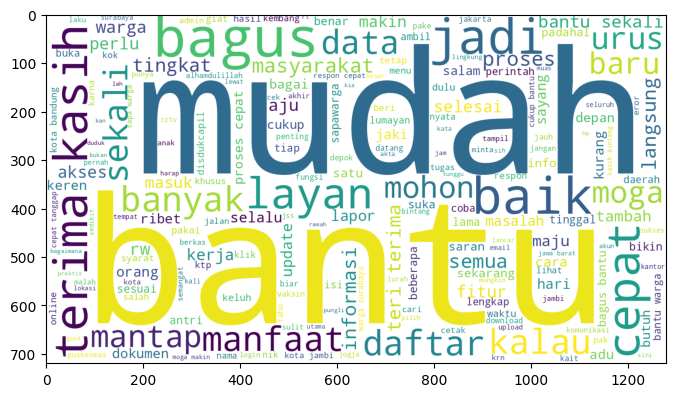

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_apresiasi)

plt.show();

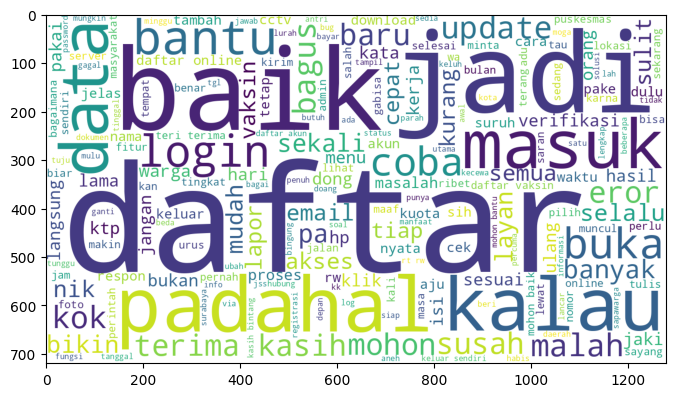

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_kritik)

plt.show();

# RNN Model

## Inisiasi Tokenizer RNN

In [ ]:
VOCAB_SIZE = 1200
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [ ]:
len(encoder.get_vocabulary())

1200

## Membangun Arsitektur Model

In [ ]:
# Membuat arsitektur model RNN meliputi LSTM, stacked LSTM, Bi-LSTM, stacked Bi-LSTM, GRU, stacked GRU, Bi-GRU, dan stacked Bi-GRU

lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

bi_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_bi_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

bi_gru= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_bi_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

In [ ]:
stacked_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GRU(64, return_sequences = True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

## Model Compiling

In [ ]:
# Melakukan compile pada seluruh arsitektur yang telah dibuat

lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

stacked_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

bi_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)



stacked_bi_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)



gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


bi_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


stacked_bi_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


In [ ]:
stacked_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

stacked_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


## Model Training

In [ ]:
lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 12s 66ms/step - loss: 0.6902 - binary_accuracy: 0.6406 - val_loss: 0.6868 - val_binary_accuracy: 0.7000
Epoch 2/25
85/85 [==============================] - 6s 72ms/step - loss: 0.6822 - binary_accuracy: 0.6940 - val_loss: 0.6765 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 4s 50ms/step - loss: 0.6667 - binary_accuracy: 0.6929 - val_loss: 0.6553 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 4s 46ms/step - loss: 0.6237 - binary_accuracy: 0.6925 - val_loss: 0.5876 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 6s 72ms/step - loss: 0.5607 - binary_accuracy: 0.6929 - val_loss: 0.5598 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 7s 85ms/step - loss: 0.5379 - binary_accuracy: 0.6925 - val_loss: 0.5444 - val_binary_accuracy: 0.6896
Epoch 7/25
85/85 [==============================] - 4s 46ms/step - lo

In [ ]:
stacked_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 23s 148ms/step - loss: 0.6908 - binary_accuracy: 0.6139 - val_loss: 0.6879 - val_binary_accuracy: 0.6836
Epoch 2/25
85/85 [==============================] - 8s 94ms/step - loss: 0.6817 - binary_accuracy: 0.6843 - val_loss: 0.6743 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 11s 132ms/step - loss: 0.6425 - binary_accuracy: 0.6940 - val_loss: 0.6030 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 9s 111ms/step - loss: 0.5584 - binary_accuracy: 0.6866 - val_loss: 0.5550 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 7s 81ms/step - loss: 0.5334 - binary_accuracy: 0.6914 - val_loss: 0.5398 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 9s 111ms/step - loss: 0.5184 - binary_accuracy: 0.6992 - val_loss: 0.5251 - val_binary_accuracy: 0.7000
Epoch 7/25
85/85 [==============================] - 7s 81ms/step

In [ ]:
bi_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 23s 146ms/step - loss: 0.6906 - binary_accuracy: 0.6513 - val_loss: 0.6873 - val_binary_accuracy: 0.6940
Epoch 2/25
85/85 [==============================] - 7s 78ms/step - loss: 0.6829 - binary_accuracy: 0.6977 - val_loss: 0.6766 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 9s 105ms/step - loss: 0.6646 - binary_accuracy: 0.6921 - val_loss: 0.6491 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 6s 76ms/step - loss: 0.6012 - binary_accuracy: 0.6925 - val_loss: 0.5778 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 9s 107ms/step - loss: 0.5604 - binary_accuracy: 0.6932 - val_loss: 0.5612 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 6s 76ms/step - loss: 0.5434 - binary_accuracy: 0.6966 - val_loss: 0.5471 - val_binary_accuracy: 0.6940
Epoch 7/25
85/85 [==============================] - 9s 110ms/step 

In [ ]:
stacked_bi_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 45s 261ms/step - loss: 0.6893 - binary_accuracy: 0.6469 - val_loss: 0.6843 - val_binary_accuracy: 0.6896
Epoch 2/25
85/85 [==============================] - 14s 161ms/step - loss: 0.6741 - binary_accuracy: 0.6914 - val_loss: 0.6603 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 13s 157ms/step - loss: 0.6096 - binary_accuracy: 0.6925 - val_loss: 0.5670 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 15s 174ms/step - loss: 0.5471 - binary_accuracy: 0.6929 - val_loss: 0.5488 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 15s 176ms/step - loss: 0.5322 - binary_accuracy: 0.6929 - val_loss: 0.5343 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 14s 167ms/step - loss: 0.5115 - binary_accuracy: 0.7051 - val_loss: 0.5117 - val_binary_accuracy: 0.6940
Epoch 7/25
85/85 [==============================] - 14s 16

In [ ]:
gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 12s 60ms/step - loss: 0.6933 - binary_accuracy: 0.4796 - val_loss: 0.6909 - val_binary_accuracy: 0.5612
Epoch 2/25
85/85 [==============================] - 4s 44ms/step - loss: 0.6887 - binary_accuracy: 0.5898 - val_loss: 0.6865 - val_binary_accuracy: 0.5821
Epoch 3/25
85/85 [==============================] - 6s 67ms/step - loss: 0.6837 - binary_accuracy: 0.6109 - val_loss: 0.6811 - val_binary_accuracy: 0.5940
Epoch 4/25
85/85 [==============================] - 4s 43ms/step - loss: 0.6777 - binary_accuracy: 0.6280 - val_loss: 0.6741 - val_binary_accuracy: 0.6328
Epoch 5/25
85/85 [==============================] - 3s 41ms/step - loss: 0.6687 - binary_accuracy: 0.6654 - val_loss: 0.6642 - val_binary_accuracy: 0.6791
Epoch 6/25
85/85 [==============================] - 4s 49ms/step - loss: 0.6561 - binary_accuracy: 0.6632 - val_loss: 0.6485 - val_binary_accuracy: 0.6925
Epoch 7/25
85/85 [==============================] - 5s 59ms/step - lo

In [ ]:
stacked_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 22s 110ms/step - loss: 0.6882 - binary_accuracy: 0.6636 - val_loss: 0.6820 - val_binary_accuracy: 0.6896
Epoch 2/25
85/85 [==============================] - 8s 100ms/step - loss: 0.6748 - binary_accuracy: 0.6929 - val_loss: 0.6640 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 6s 75ms/step - loss: 0.6497 - binary_accuracy: 0.6914 - val_loss: 0.6304 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 8s 100ms/step - loss: 0.6068 - binary_accuracy: 0.6925 - val_loss: 0.5798 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 6s 74ms/step - loss: 0.5602 - binary_accuracy: 0.6921 - val_loss: 0.5449 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 8s 98ms/step - loss: 0.5308 - binary_accuracy: 0.6929 - val_loss: 0.5214 - val_binary_accuracy: 0.6910
Epoch 7/25
85/85 [==============================] - 6s 74ms/step -

In [ ]:
bi_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 20s 114ms/step - loss: 0.6906 - binary_accuracy: 0.5983 - val_loss: 0.6877 - val_binary_accuracy: 0.6806
Epoch 2/25
85/85 [==============================] - 7s 77ms/step - loss: 0.6829 - binary_accuracy: 0.6818 - val_loss: 0.6783 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 6s 69ms/step - loss: 0.6712 - binary_accuracy: 0.6921 - val_loss: 0.6651 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 8s 90ms/step - loss: 0.6560 - binary_accuracy: 0.6925 - val_loss: 0.6479 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 6s 65ms/step - loss: 0.6318 - binary_accuracy: 0.6925 - val_loss: 0.6217 - val_binary_accuracy: 0.6896
Epoch 6/25
85/85 [==============================] - 8s 96ms/step - loss: 0.6001 - binary_accuracy: 0.6925 - val_loss: 0.5855 - val_binary_accuracy: 0.6896
Epoch 7/25
85/85 [==============================] - 6s 68ms/step - l

In [ ]:
stacked_bi_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 25,
)

Epoch 1/25
85/85 [==============================] - 40s 220ms/step - loss: 0.6886 - binary_accuracy: 0.6380 - val_loss: 0.6807 - val_binary_accuracy: 0.6881
Epoch 2/25
85/85 [==============================] - 13s 157ms/step - loss: 0.6723 - binary_accuracy: 0.6907 - val_loss: 0.6602 - val_binary_accuracy: 0.6896
Epoch 3/25
85/85 [==============================] - 13s 155ms/step - loss: 0.6419 - binary_accuracy: 0.6932 - val_loss: 0.6213 - val_binary_accuracy: 0.6896
Epoch 4/25
85/85 [==============================] - 13s 158ms/step - loss: 0.5943 - binary_accuracy: 0.6929 - val_loss: 0.5696 - val_binary_accuracy: 0.6896
Epoch 5/25
85/85 [==============================] - 13s 151ms/step - loss: 0.5462 - binary_accuracy: 0.6940 - val_loss: 0.5309 - val_binary_accuracy: 0.6910
Epoch 6/25
85/85 [==============================] - 11s 133ms/step - loss: 0.5080 - binary_accuracy: 0.7059 - val_loss: 0.4918 - val_binary_accuracy: 0.7104
Epoch 7/25
85/85 [==============================] - 13s 15

## Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report

# Label kelas target untuk penamaan pada tabel classification report
class_labels = ["apresiasi", "kritik"]

In [ ]:
# Evaluasi LSTM
y_pred = lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

   apresiasi       0.86      0.80      0.83       121
      kritik       0.96      0.90      0.93       248

   micro avg       0.93      0.87      0.90       369
   macro avg       0.91      0.85      0.88       369
weighted avg       0.93      0.87      0.90       369
 samples avg       0.94      0.90      0.91       369



In [ ]:
# Evaluasi Stacked LSTM

y_pred = stacked_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 22ms/step
              precision    recall  f1-score   support

   apresiasi       0.84      0.89      0.87       121
      kritik       0.97      0.85      0.90       248

   micro avg       0.92      0.86      0.89       369
   macro avg       0.91      0.87      0.89       369
weighted avg       0.93      0.86      0.89       369
 samples avg       0.93      0.90      0.90       369



In [ ]:
# Evaluasi Bi-LSTM

y_pred = bi_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 17ms/step
              precision    recall  f1-score   support

   apresiasi       0.86      0.89      0.88       121
      kritik       0.97      0.96      0.97       248

   micro avg       0.93      0.94      0.94       369
   macro avg       0.92      0.93      0.92       369
weighted avg       0.93      0.94      0.94       369
 samples avg       0.95      0.95      0.94       369



In [ ]:
# Evaluasi Stacked Bi-LSTM

y_pred = stacked_bi_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 7s 65ms/step
              precision    recall  f1-score   support

   apresiasi       0.86      0.95      0.90       121
      kritik       0.98      0.93      0.95       248

   micro avg       0.94      0.94      0.94       369
   macro avg       0.92      0.94      0.93       369
weighted avg       0.94      0.94      0.94       369
 samples avg       0.95      0.95      0.94       369



In [ ]:
# Evaluasi GRU

y_pred = gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.79      0.82       121
      kritik       0.97      0.90      0.93       248

   micro avg       0.93      0.86      0.89       369
   macro avg       0.91      0.84      0.87       369
weighted avg       0.93      0.86      0.89       369
 samples avg       0.93      0.89      0.90       369



In [ ]:
# Evaluasi Stacked GRU

y_pred = stacked_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 17ms/step
              precision    recall  f1-score   support

   apresiasi       0.84      0.87      0.85       121
      kritik       0.98      0.88      0.93       248

   micro avg       0.93      0.88      0.90       369
   macro avg       0.91      0.87      0.89       369
weighted avg       0.94      0.88      0.90       369
 samples avg       0.94      0.91      0.91       369



In [ ]:
# Evaluasi Bi-GRU

y_pred = bi_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 17ms/step
              precision    recall  f1-score   support

   apresiasi       0.84      0.90      0.87       121
      kritik       0.96      0.96      0.96       248

   micro avg       0.92      0.94      0.93       369
   macro avg       0.90      0.93      0.91       369
weighted avg       0.92      0.94      0.93       369
 samples avg       0.94      0.96      0.94       369



In [ ]:
# Evaluasi Stacked Bi-GRU

y_pred = stacked_bi_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 7s 28ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.91      0.88       121
      kritik       0.98      0.95      0.97       248

   micro avg       0.93      0.94      0.94       369
   macro avg       0.91      0.93      0.92       369
weighted avg       0.94      0.94      0.94       369
 samples avg       0.95      0.96      0.95       369



## Menyimpan Model

In [ ]:
# Menyimpan model ke directory

# lstm.save("lstm-1")
# bi_lstm.save("bi-lstm-1")
# stacked_bi_lstm.save("stacked-bi-lstm-1")
# gru.save("gru-1")
# bi_gru.save("bi-gru-1")
# stacked_bi_gru.save("stacked-bi-gru-1")

# BERT Model

## Mapping BERT Preprocesser and Encoder

In [ ]:
# Map kata kunci untuk menuju URL dependencies BERT preprocesser dan BERT encoder

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

## Membangun Arsitektur Model

In [ ]:
# Mendefinisikan fungsi untuk membuat model large BERT, small BERT, Electra, dan Albert

def build_bert_model(bert_model_name: str):
  tfhub_handle_encoder = map_name_to_handle[bert_model_name]
  tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

  text_input = tf.keras.layers.Input(shape=(), dtype="string")
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(2, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
# Membuat IndoBERT architecture

from transformers import AutoTokenizer,  TFAutoModelForSequenceClassification
indobert_tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
indobert_fine_tune_model = TFAutoModelForSequenceClassification.from_pretrained("indolem/indobert-base-uncased",
                                                                                from_pt=True,
                                                                                num_labels = 2,
                                                                                problem_type = "multi-label-classification")


# Tokenize dataset using IndoBERT tokenizer
X_train_indobert = indobert_tokenizer(list(X_train), return_tensors = "np", padding = True)
X_train_indobert = dict(X_train_indobert)

X_test_indobert = indobert_tokenizer(list(X_test), return_tensors = "np", padding = True)
X_test_indobert = dict(X_test_indobert)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Membuat model BERT selain IndoBERT

bert_uncased_model = build_bert_model('bert_en_uncased_L-12_H-768_A-12')
small_bert_model = build_bert_model('small_bert/bert_en_uncased_L-4_H-512_A-8')
albert_model = build_bert_model('albert_en_base')
electra_model = build_bert_model('electra_base')

## Model Compiling

In [ ]:
indobert_fine_tune_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

In [ ]:
bert_uncased_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

small_bert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

albert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

electra_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

## Model Training

In [ ]:
indobert_fine_tune_model.fit(
    x = X_train_indobert,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test_indobert, y_test),
    epochs = 3,
)

Epoch 1/3
85/85 [==============================] - 108s 480ms/step - loss: 0.8048 - binary_accuracy: 0.6539 - val_loss: 0.5360 - val_binary_accuracy: 0.7134
Epoch 2/3
85/85 [==============================] - 35s 413ms/step - loss: 0.5876 - binary_accuracy: 0.7355 - val_loss: 0.4804 - val_binary_accuracy: 0.7806
Epoch 3/3
85/85 [==============================] - 33s 389ms/step - loss: 0.6454 - binary_accuracy: 0.7329 - val_loss: 0.5170 - val_binary_accuracy: 0.7642


In [ ]:
bert_uncased_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3,
)


Epoch 1/3
85/85 [==============================] - 97s 589ms/step - loss: 0.5240 - binary_accuracy: 0.7448 - val_loss: 0.3569 - val_binary_accuracy: 0.8582
Epoch 2/3
85/85 [==============================] - 47s 558ms/step - loss: 0.3034 - binary_accuracy: 0.8731 - val_loss: 0.4417 - val_binary_accuracy: 0.8299
Epoch 3/3
85/85 [==============================] - 46s 539ms/step - loss: 0.2047 - binary_accuracy: 0.9184 - val_loss: 0.1944 - val_binary_accuracy: 0.9328


In [ ]:
small_bert_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3,
)

Epoch 1/3
85/85 [==============================] - 41s 292ms/step - loss: 0.4874 - binary_accuracy: 0.7700 - val_loss: 0.4115 - val_binary_accuracy: 0.8224
Epoch 2/3
85/85 [==============================] - 17s 203ms/step - loss: 0.3354 - binary_accuracy: 0.8594 - val_loss: 0.3070 - val_binary_accuracy: 0.8672
Epoch 3/3
85/85 [==============================] - 14s 160ms/step - loss: 0.2564 - binary_accuracy: 0.9024 - val_loss: 0.2610 - val_binary_accuracy: 0.8940


In [ ]:
albert_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3,
)

Epoch 1/3
85/85 [==============================] - 71s 632ms/step - loss: 0.5895 - binary_accuracy: 0.6955 - val_loss: 0.5972 - val_binary_accuracy: 0.6642
Epoch 2/3
85/85 [==============================] - 53s 625ms/step - loss: 0.6194 - binary_accuracy: 0.6907 - val_loss: 0.6081 - val_binary_accuracy: 0.6896
Epoch 3/3
85/85 [==============================] - 54s 640ms/step - loss: 0.5225 - binary_accuracy: 0.7530 - val_loss: 0.4722 - val_binary_accuracy: 0.8090


In [ ]:
electra_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3,
)

Epoch 1/3
85/85 [==============================] - 52s 614ms/step - loss: 0.1741 - binary_accuracy: 0.9266 - val_loss: 0.2487 - val_binary_accuracy: 0.8970
Epoch 2/3
85/85 [==============================] - 46s 537ms/step - loss: 0.1628 - binary_accuracy: 0.9366 - val_loss: 0.2439 - val_binary_accuracy: 0.9015
Epoch 3/3
85/85 [==============================] - 47s 549ms/step - loss: 0.1316 - binary_accuracy: 0.9473 - val_loss: 0.2067 - val_binary_accuracy: 0.9328


## Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report

class_labels = ["apresiasi", "kritik"]

In [ ]:
# Evaluasi Model IndoBERT

y_pred = indobert_fine_tune_model.predict(X_test_indobert)["logits"] > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 5s 200ms/step
              precision    recall  f1-score   support

   apresiasi       0.68      0.47      0.56       121
      kritik       0.82      0.94      0.87       248

   micro avg       0.78      0.79      0.79       369
   macro avg       0.75      0.71      0.72       369
weighted avg       0.77      0.79      0.77       369
 samples avg       0.78      0.80      0.78       369



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluasi Model Large BERT

y_pred = bert_uncased_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 5s 383ms/step
              precision    recall  f1-score   support

   apresiasi       0.88      0.93      0.91       121
      kritik       0.97      0.94      0.96       248

   micro avg       0.94      0.94      0.94       369
   macro avg       0.92      0.94      0.93       369
weighted avg       0.94      0.94      0.94       369
 samples avg       0.95      0.95      0.95       369



In [ ]:
# Evaluasi Model Small BERT

y_pred = small_bert_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 1s 94ms/step
              precision    recall  f1-score   support

   apresiasi       0.84      0.80      0.82       121
      kritik       0.95      0.94      0.94       248

   micro avg       0.91      0.89      0.90       369
   macro avg       0.90      0.87      0.88       369
weighted avg       0.91      0.89      0.90       369
 samples avg       0.92      0.91      0.91       369



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluasi Model Albert

y_pred = albert_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 4s 343ms/step
              precision    recall  f1-score   support

   apresiasi       0.78      0.57      0.66       121
      kritik       0.85      0.94      0.89       248

   micro avg       0.83      0.82      0.83       369
   macro avg       0.81      0.76      0.78       369
weighted avg       0.82      0.82      0.82       369
 samples avg       0.86      0.85      0.84       369



In [ ]:
# Evaluasi Model Electra

y_pred = electra_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 4s 412ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.93      0.89       121
      kritik       0.98      0.96      0.97       248

   micro avg       0.93      0.95      0.94       369
   macro avg       0.91      0.94      0.93       369
weighted avg       0.93      0.95      0.94       369
 samples avg       0.95      0.96      0.95       369



## Save Model

In [ ]:
# Menyimpan model ke directory

# bert_uncased_model.save("bert-1")
# small_bert_model.save("small-bert-1")
# albert_model.save("albert-1")
# electra_model.save("electra-1")